# Fateme Fouladi

# HomeWork 05

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1

In [84]:
# load datasets
train_df=pd.read_csv('Dataset\\train_set.csv')
train_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,37,Private,140673,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,40,United-States,>50K
1,62,Private,35783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,<=50K
2,30,Private,190511,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
3,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
4,69,Self-emp-not-inc,170877,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,48,United-States,<=50K


In [85]:
train_df['income']

0          >50K
1         <=50K
2          >50K
3         <=50K
4         <=50K
          ...  
22787      >50K
22788     <=50K
22789      >50K
22790     <=50K
22791     <=50K
Name: income, Length: 22792, dtype: object

In [86]:
#test set
test_df=pd.read_csv('Dataset\\test_set.csv')
test_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,34,Local-gov,226296,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
1,58,?,361870,HS-grad,9,Married-civ-spouse,?,Husband,Black,Male,30,United-States
2,32,Private,46691,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States
3,20,?,182117,Some-college,10,Never-married,?,Own-child,White,Male,40,United-States
4,28,Private,96020,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,50,United-States


In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              22792 non-null  int64 
 1   workclass        22792 non-null  object
 2   fnlwgt           22792 non-null  int64 
 3   education        22792 non-null  object
 4   educational-num  22792 non-null  int64 
 5   marital-status   22792 non-null  object
 6   occupation       22792 non-null  object
 7   relationship     22792 non-null  object
 8   race             22792 non-null  object
 9   gender           22792 non-null  object
 10  hours-per-week   22792 non-null  int64 
 11  native-country   22792 non-null  object
 12  income           22792 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.3+ MB


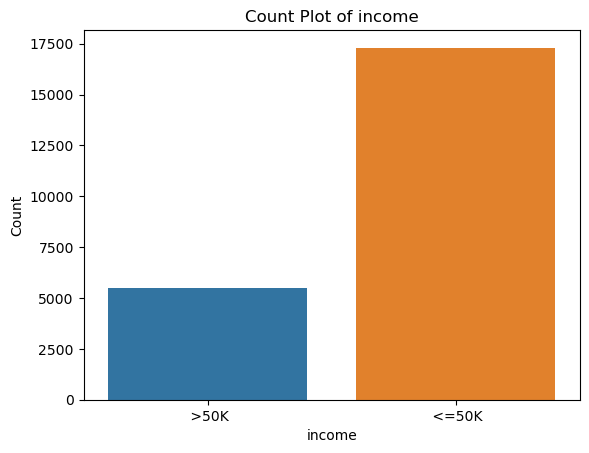

In [88]:
# count plot of target

sns.countplot(x=train_df['income'])
plt.xlabel('income')
plt.ylabel('Count')
plt.title(f'Count Plot of income')
plt.show()

In [89]:
# splitting X and y
X = train_df.drop('income', axis=1)
y = train_df['income']

In [90]:
# numerical and categorical features
numerical_features=['age', 'fnlwgt', 'educational-num', 'hours-per-week']
categorical_features=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Scaling numerical data

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# create a ColumnTransformer that use MinMaxScaler to scale numerical data
preprocessor_scale = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ],
    remainder='passthrough' 
)


X_train_transformed = preprocessor_scale.fit_transform(X)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=numerical_features + categorical_features)

In [92]:
X_train_transformed_df

,age,fnlwgt,educational-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,0.273973,0.087195,0.6,0.397959,Private,Some-college,Married-civ-spouse,Sales,Wife,White,Female,United-States
1,0.616438,0.015959,0.6,0.602041,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
2,0.178082,0.121043,0.533333,0.397959,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
3,0.671233,0.02382,0.333333,0.397959,Federal-gov,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
4,0.712329,0.107708,0.533333,0.479592,Self-emp-not-inc,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.561644,0.121214,0.8,0.397959,Self-emp-inc,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
22788,0.465753,0.111178,0.533333,0.397959,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States
22789,0.260274,0.095612,0.6,0.5,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
22790,0.438356,0.24812,0.733333,0.5,Self-emp-not-inc,Assoc-acdm,Divorced,Sales,Not-in-family,White,Male,United-States


# 2

we create a function for preprocessing data that scales numerical data and encodes categorical data.

In [93]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

def preprocess_data(X, numerical_features, categorical_features, is_training=True, preprocessor=None):
    # scaling using MinMaxScaler
    numerical_transformer = MinMaxScaler()

    # One-hot encoding for categorical features
    categorical_transformer = OneHotEncoder(drop='first', sparse=False)

    # If it's training data, fit and transform the ColumnTransformer
    if is_training:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features),
                ('cat', categorical_transformer, categorical_features)
            ],
            remainder='passthrough'
        )
        X_transformed = preprocessor.fit_transform(X)

    # If it's test data, just transform data using the preprocessor created during training
    else: 
        if preprocessor is None:
            raise ValueError("Preprocessor must be provided for test data.")
        X_transformed = preprocessor.transform(X)

    # column names after one-hot encoding
    if is_training:
        encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    else: 
        encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

    # final dataFrame with numerical and encoded categorical data
    X_transformed_df = pd.DataFrame(X_transformed, columns=numerical_features + encoded_columns)

    return X_transformed_df, preprocessor




In [94]:
# use function for preprocessing train data
X_train_transformed_df, preprocessor = preprocess_data(X, numerical_features, categorical_features)

c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [95]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 ['age', 'fnlwgt', 'educational-num',
                                  'hours-per-week']),
                                ('cat',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race',
                                  'gender', 'native-country'])])

In [96]:
X_train_transformed_df

,age,fnlwgt,educational-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.273973,0.087195,0.600000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.616438,0.015959,0.600000,0.602041,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.178082,0.121043,0.533333,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.671233,0.023820,0.333333,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.712329,0.107708,0.533333,0.479592,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.561644,0.121214,0.800000,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22788,0.465753,0.111178,0.533333,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22789,0.260274,0.095612,0.600000,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22790,0.438356,0.248120,0.733333,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
# transform preprocess models on test set
X_test_transformed_df, _ = preprocess_data(test_df, numerical_features, categorical_features, is_training=False, preprocessor=preprocessor)

In [98]:
X_test_transformed_df

,age,fnlwgt,educational-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.232877,0.145346,0.800000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.561644,0.237422,0.533333,0.295918,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.205479,0.023367,0.800000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.041096,0.115342,0.600000,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.056869,0.800000,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.082192,0.268537,0.266667,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9765,0.684932,0.110505,0.600000,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9766,0.136986,0.137257,0.533333,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9767,0.315068,0.186579,0.933333,0.551020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training logistic regression

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score


# parameters
param_grid = {
    'alpha': [0, 1e-2, 1e-5],  # L2 regularization term
    'learning_rate': ['constant'],
    'eta0': [1, 1e-2, 1e-5],  # Learning rate
    'max_iter': [500, 1000, 2000] # Iteration
}

# SGDClassifier with cross-entropy loss function
sgd_classifier = SGDClassifier(loss='log_loss')


# Create the GridSearchCV for evaluating models performance using Repeated5KFold CV
rkf=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

grid_search = GridSearchCV(
    sgd_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=rkf,
    verbose=1,
    n_jobs=-1 
)

# Fitting model
grid_search.fit(X_train_transformed_df, y)



Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=SGDClassifier(loss='log_loss'), n_jobs=-1,
             param_grid={'alpha': [0, 0.01, 1e-05], 'eta0': [1, 0.01, 1e-05],
                         'learning_rate': ['constant'],
                         'max_iter': [500, 1000, 2000]},
             scoring='accuracy', verbose=1)

In [100]:
# best model
best_model = grid_search.best_estimator_

# best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# train accuracy
y_train_pred = best_model.predict(X_train_transformed_df)
train_accuracy = accuracy_score(y, y_train_pred)
print("Train Accuracy:", train_accuracy)

# test accuracy
test_accuracy = grid_search.best_score_
print("Test Accuracy:", test_accuracy)


Best Parameters: {'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 2000}
Train Accuracy: 0.8325289575289575
Test Accuracy: 0.8339989004771047


In [101]:
# cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_max_iter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.143910,0.018140,0.027206,0.007013,0,1,constant,500,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'cons...",0.791621,...,0.831724,0.794427,0.784383,0.803685,0.808469,0.807591,0.793111,0.804472,0.013944,10
1,0.153967,0.023254,0.036052,0.007249,0,1,constant,1000,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'cons...",0.792498,...,0.806933,0.801887,0.819697,0.804782,0.817464,0.435498,0.794208,0.766626,0.110760,21
2,0.162261,0.037823,0.016219,0.001412,0,1,constant,2000,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'cons...",0.777144,...,0.807152,0.735191,0.805659,0.806975,0.801448,0.811540,0.805178,0.782291,0.038174,14
3,0.202545,0.023731,0.017084,0.003703,0,0.01,constant,500,"{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'c...",0.833077,...,0.838087,0.831286,0.836148,0.830007,0.834357,0.831505,0.829530,0.832507,0.002864,5
4,0.199985,0.021319,0.018001,0.005063,0,0.01,constant,1000,"{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'c...",0.833516,...,0.836771,0.834138,0.836368,0.830445,0.828214,0.829092,0.825801,0.832090,0.003535,6
5,0.196501,0.018912,0.018754,0.006253,0,0.01,constant,2000,"{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'c...",0.835052,...,0.838964,0.834796,0.834174,0.831103,0.836332,0.830408,0.833918,0.833999,0.002702,1
6,0.754775,0.032029,0.016328,0.001945,0,0.00001,constant,500,"{'alpha': 0, 'eta0': 1e-05, 'learning_rate': '...",0.775170,...,0.772927,0.775121,0.772757,0.775609,0.771172,0.772927,0.771610,0.773034,0.002025,20
7,0.730185,0.026984,0.017196,0.004690,0,0.00001,constant,1000,"{'alpha': 0, 'eta0': 1e-05, 'learning_rate': '...",0.775170,...,0.772927,0.775121,0.772977,0.776267,0.770952,0.772927,0.771391,0.773078,0.002151,18
8,0.775163,0.021363,0.015694,0.001587,0,0.00001,constant,2000,"{'alpha': 0, 'eta0': 1e-05, 'learning_rate': '...",0.775170,...,0.772927,0.775121,0.772977,0.776047,0.771172,0.772927,0.771610,0.773100,0.002082,16
9,0.164344,0.045402,0.013784,0.006155,0.01,1,constant,500,"{'alpha': 0.01, 'eta0': 1, 'learning_rate': 'c...",0.760254,...,0.746819,0.757569,0.776267,0.563281,0.693725,0.801448,0.786090,0.715981,0.096555,26


In [102]:
# create a dataframe for cross-validation results for plotting boxplots

results_df=cv_results.iloc[:, 8:-3]
df_res = results_df.T
df_res.columns= df_res.iloc[0].apply(lambda x: str(x))
df_res = df_res[1:]
df_res

params,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 0, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 0, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 0, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 0, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 0, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 0.01, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 500}",...,"{'alpha': 0.01, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 2000}"
split0_test_score,0.791621,0.792498,0.777144,0.833077,0.833516,0.835052,0.77517,0.77517,0.77517,0.760254,...,0.767493,0.801053,0.817284,0.81531,0.834174,0.834613,0.833955,0.77517,0.77517,0.77517
split1_test_score,0.805878,0.790524,0.784163,0.828471,0.831103,0.829787,0.774293,0.774293,0.774293,0.502084,...,0.765957,0.8254,0.809827,0.800834,0.829349,0.8322,0.827594,0.774293,0.774293,0.774293
split2_test_score,0.823826,0.802764,0.68846,0.832602,0.835454,0.835454,0.768758,0.768758,0.768758,0.772269,...,0.761738,0.795963,0.777973,0.792892,0.834577,0.831724,0.835235,0.768978,0.768978,0.768758
split3_test_score,0.831724,0.806933,0.807152,0.838087,0.836771,0.838964,0.772927,0.772927,0.772927,0.746819,...,0.768758,0.832163,0.814612,0.772927,0.834138,0.835893,0.835235,0.772927,0.772927,0.772927
split4_test_score,0.794427,0.801887,0.735191,0.831286,0.834138,0.834796,0.775121,0.775121,0.775121,0.757569,...,0.766345,0.797499,0.80057,0.798157,0.831066,0.832163,0.834138,0.775121,0.775121,0.774901
split5_test_score,0.784383,0.819697,0.805659,0.836148,0.836368,0.834174,0.772757,0.772977,0.772977,0.776267,...,0.765519,0.81553,0.768809,0.790086,0.839438,0.83571,0.839658,0.772977,0.772757,0.772977
split6_test_score,0.803685,0.804782,0.806975,0.830007,0.830445,0.831103,0.775609,0.776267,0.776047,0.563281,...,0.767932,0.792718,0.808511,0.765519,0.831542,0.833516,0.830665,0.776267,0.776267,0.776047
split7_test_score,0.808469,0.817464,0.801448,0.834357,0.828214,0.836332,0.771172,0.770952,0.771172,0.693725,...,0.764809,0.786968,0.782799,0.750548,0.835015,0.838306,0.835893,0.771172,0.770952,0.771172
split8_test_score,0.807591,0.435498,0.81154,0.831505,0.829092,0.830408,0.772927,0.772927,0.772927,0.801448,...,0.765687,0.774243,0.822729,0.799254,0.83326,0.832383,0.829092,0.772927,0.772927,0.772927
split9_test_score,0.793111,0.794208,0.805178,0.82953,0.825801,0.833918,0.77161,0.771391,0.77161,0.78609,...,0.765248,0.806933,0.792453,0.790478,0.830627,0.830189,0.83348,0.77161,0.771391,0.771391


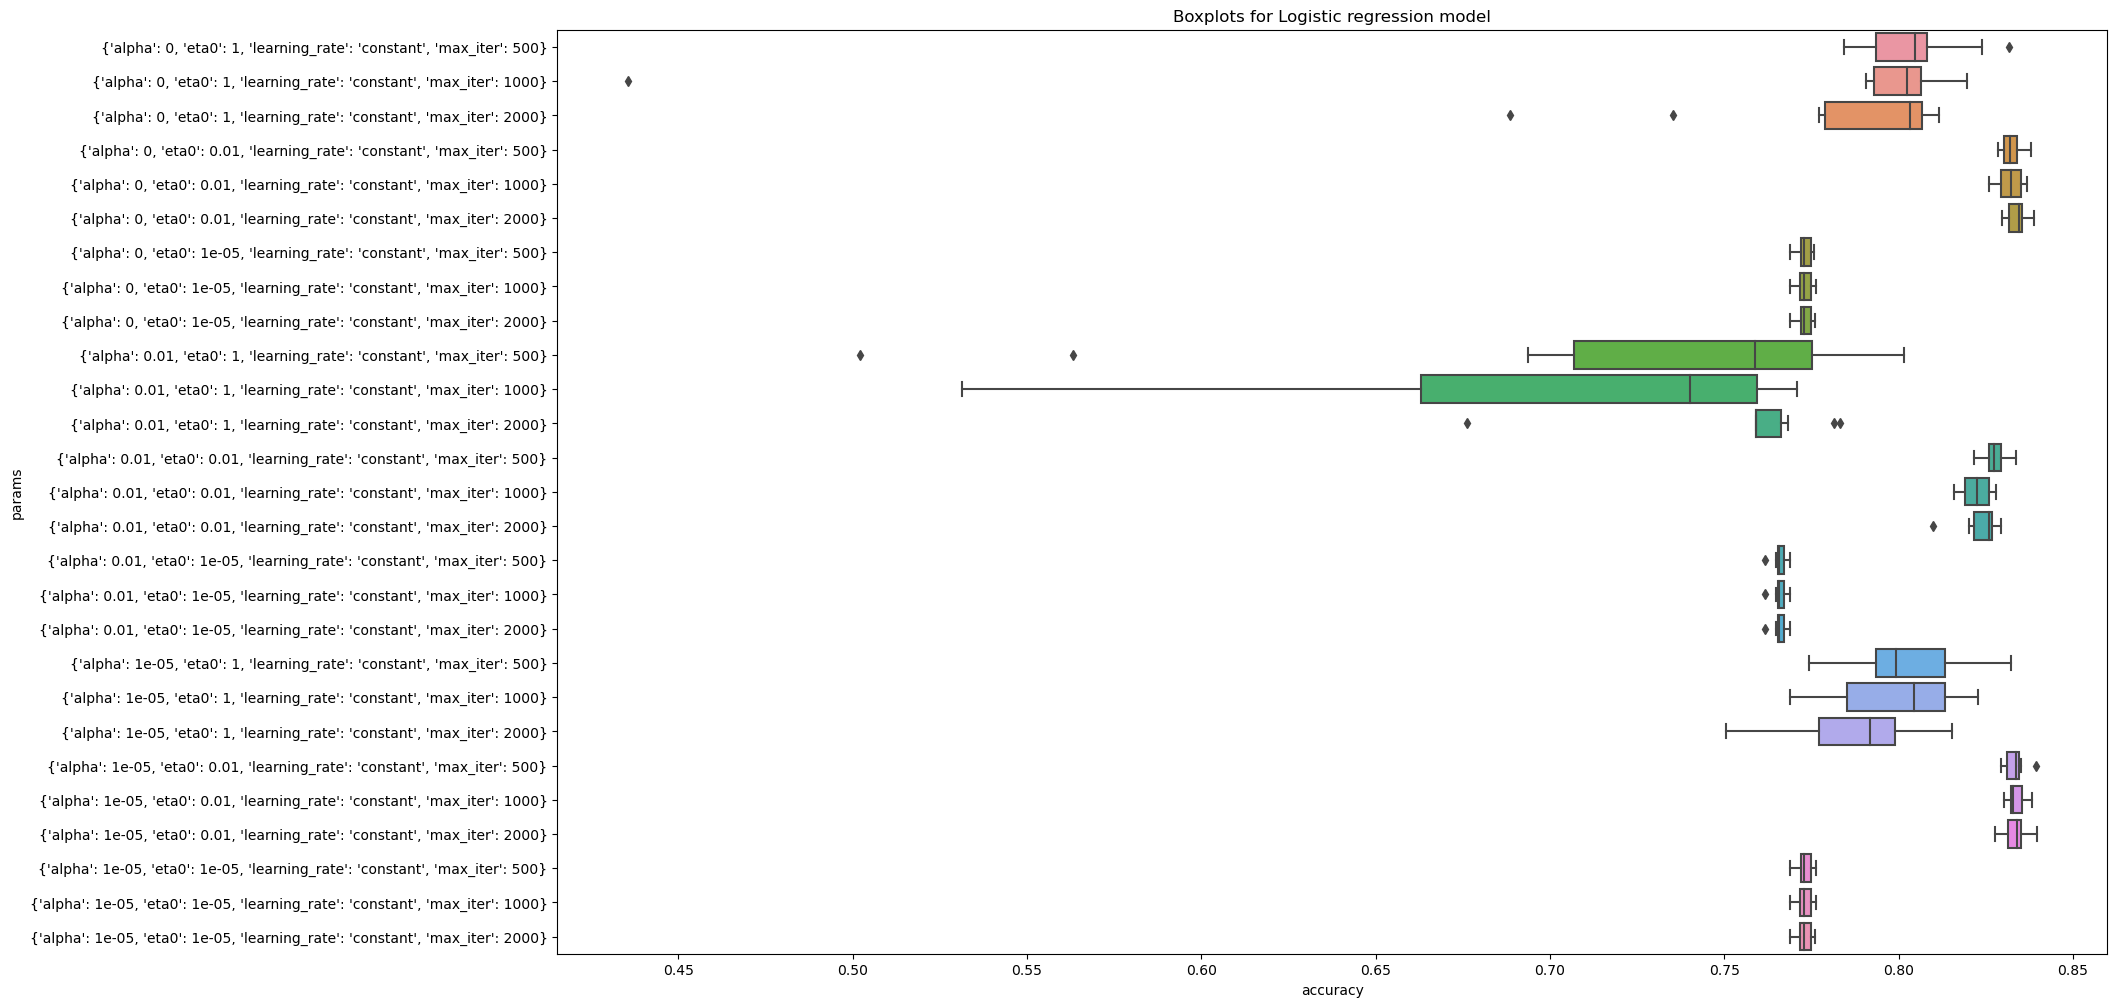

In [103]:
#boxplots

plt.figure(figsize=(20, 12))
sns.boxplot(data=df_res, orient='h')
plt.xlabel('accuracy')
plt.title('Boxplots for Logistic regression model')
plt.show()

Then we add two values to 'alpha' and 'eta0' and evaluate it again

In [121]:
# parameters
param_grid = {
    'alpha': [0, 1e-2, 1e-5, 1e-3, 1e-7],  # L2 regularization term
    'learning_rate': ['constant'],
    'eta0': [1, 1e-2, 1e-5, 1e-3, 1e-1],  # Learning rate
    'max_iter': [500, 1000, 2000] # Iteration
}

# Create the GridSearchCV for evaluating models performance using Repeated5KFold CV
grid_search = GridSearchCV(
    sgd_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=rkf,
    verbose=1,
    n_jobs=-1 
)

# Fitting model
grid_search.fit(X_train_transformed_df, y)

# best model
best_model = grid_search.best_estimator_

# best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# train accuracy
y_train_pred = best_model.predict(X_train_transformed_df)
train_accuracy = accuracy_score(y, y_train_pred)
print("Train Accuracy:", train_accuracy)

# test accuracy
test_accuracy = grid_search.best_score_
print("Test Accuracy:", test_accuracy)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
Best Parameters: {'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 2000}
Train Accuracy: 0.8354685854685855
Test Accuracy: 0.8338453002855353


In [105]:
# usiing best parameters to fit model on train set and predict labels for test set
sgd_classifier = SGDClassifier(loss='log_loss', alpha=0, eta0=0.01, learning_rate='constant', max_iter=1000)
sgd_classifier.fit(X_train_transformed_df, y)
# predict labels
y_test_pred_lr=sgd_classifier.predict(X_test_transformed_df)

In [106]:
#saving predictions in a csv file
output_file_path = 'C:\\Users\\LEGION\\data_projects\\prediction_lr.csv'

df_y__test_pred_lr=pd.DataFrame({'labels': y_test_pred_lr})
df_y__test_pred_lr.to_csv(output_file_path, index=False)

# 3

In [107]:
X_train_transformed_df.head()

,age,fnlwgt,educational-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.273973,0.087195,0.600000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.616438,0.015959,0.600000,0.602041,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.178082,0.121043,0.533333,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.671233,0.023820,0.333333,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.712329,0.107708,0.533333,0.479592,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


MixedNB() model gets column indices not column names

In [108]:
# categorical columns
cat_indx = list(range(4, 97))

MixedNB() model works with numerical labels so we encode our y using LabelEncoder()

In [109]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
df_y = pd.DataFrame({'y_encoded': y_encoded})

In [110]:
from mixed_naive_bayes import MixedNB

nb_clf = MixedNB(categorical_features=cat_indx)
nb_clf.fit(X_train_transformed_df ,y_encoded)


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [111]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

# evaluate model using Repeated 5Fold cross-validation
scores_nb = cross_val_score(nb_clf, X_train_transformed_df ,y_encoded, cv=rkf, scoring='accuracy')

print("Cross-validated scores for Naive Bayes:", scores_nb)

c:\Users\LEGION\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
c:\Users\LEGION\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':
c:\Users\LEGION\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
c:\Users\LEGION\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_featu

Cross-validated scores for Naive Bayes: [0.81618776 0.80960737 0.81834138 0.82667837 0.82382624 0.82518096
 0.82211011 0.81680562 0.82338745 0.80298376]


c:\Users\LEGION\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:275: RuntimeWarning: invalid value encountered in divide
  normalised = finals/finals.sum(axis=1, keepdims=True)


In [123]:
y_pred_train_nb=nb_clf.predict(X_train_transformed_df)
train_accuracy_nb = accuracy_score(df_y, y_pred_train_nb)

# train accuracy
print("Naive Bayes Train Accuracy:", train_accuracy_nb)

# validation accuracy
print('Naive Bayes validation accuracy: ', scores_nb.mean())

Naive Bayes Train Accuracy: 0.8192786942786943
Naive Bayes validation accuracy:  0.818510902013973


In [113]:
# Add the Naive Bayes scores to df_res dataframe to plot boxplots
df_res['Naive Bayes'] = scores_nb
df_res

params,"{'alpha': 0, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 0, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 0, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 0, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 0, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 0, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 0, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 0.01, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 500}",...,"{'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 1e-05, 'eta0': 1, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 2000}","{'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 500}","{'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 1000}","{'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'max_iter': 2000}",Naive Bayes
split0_test_score,0.791621,0.792498,0.777144,0.833077,0.833516,0.835052,0.77517,0.77517,0.77517,0.760254,...,0.801053,0.817284,0.81531,0.834174,0.834613,0.833955,0.77517,0.77517,0.77517,0.816188
split1_test_score,0.805878,0.790524,0.784163,0.828471,0.831103,0.829787,0.774293,0.774293,0.774293,0.502084,...,0.8254,0.809827,0.800834,0.829349,0.8322,0.827594,0.774293,0.774293,0.774293,0.809607
split2_test_score,0.823826,0.802764,0.68846,0.832602,0.835454,0.835454,0.768758,0.768758,0.768758,0.772269,...,0.795963,0.777973,0.792892,0.834577,0.831724,0.835235,0.768978,0.768978,0.768758,0.818341
split3_test_score,0.831724,0.806933,0.807152,0.838087,0.836771,0.838964,0.772927,0.772927,0.772927,0.746819,...,0.832163,0.814612,0.772927,0.834138,0.835893,0.835235,0.772927,0.772927,0.772927,0.826678
split4_test_score,0.794427,0.801887,0.735191,0.831286,0.834138,0.834796,0.775121,0.775121,0.775121,0.757569,...,0.797499,0.80057,0.798157,0.831066,0.832163,0.834138,0.775121,0.775121,0.774901,0.823826
split5_test_score,0.784383,0.819697,0.805659,0.836148,0.836368,0.834174,0.772757,0.772977,0.772977,0.776267,...,0.81553,0.768809,0.790086,0.839438,0.83571,0.839658,0.772977,0.772757,0.772977,0.825181
split6_test_score,0.803685,0.804782,0.806975,0.830007,0.830445,0.831103,0.775609,0.776267,0.776047,0.563281,...,0.792718,0.808511,0.765519,0.831542,0.833516,0.830665,0.776267,0.776267,0.776047,0.822110
split7_test_score,0.808469,0.817464,0.801448,0.834357,0.828214,0.836332,0.771172,0.770952,0.771172,0.693725,...,0.786968,0.782799,0.750548,0.835015,0.838306,0.835893,0.771172,0.770952,0.771172,0.816806
split8_test_score,0.807591,0.435498,0.81154,0.831505,0.829092,0.830408,0.772927,0.772927,0.772927,0.801448,...,0.774243,0.822729,0.799254,0.83326,0.832383,0.829092,0.772927,0.772927,0.772927,0.823387
split9_test_score,0.793111,0.794208,0.805178,0.82953,0.825801,0.833918,0.77161,0.771391,0.77161,0.78609,...,0.806933,0.792453,0.790478,0.830627,0.830189,0.83348,0.77161,0.771391,0.771391,0.802984


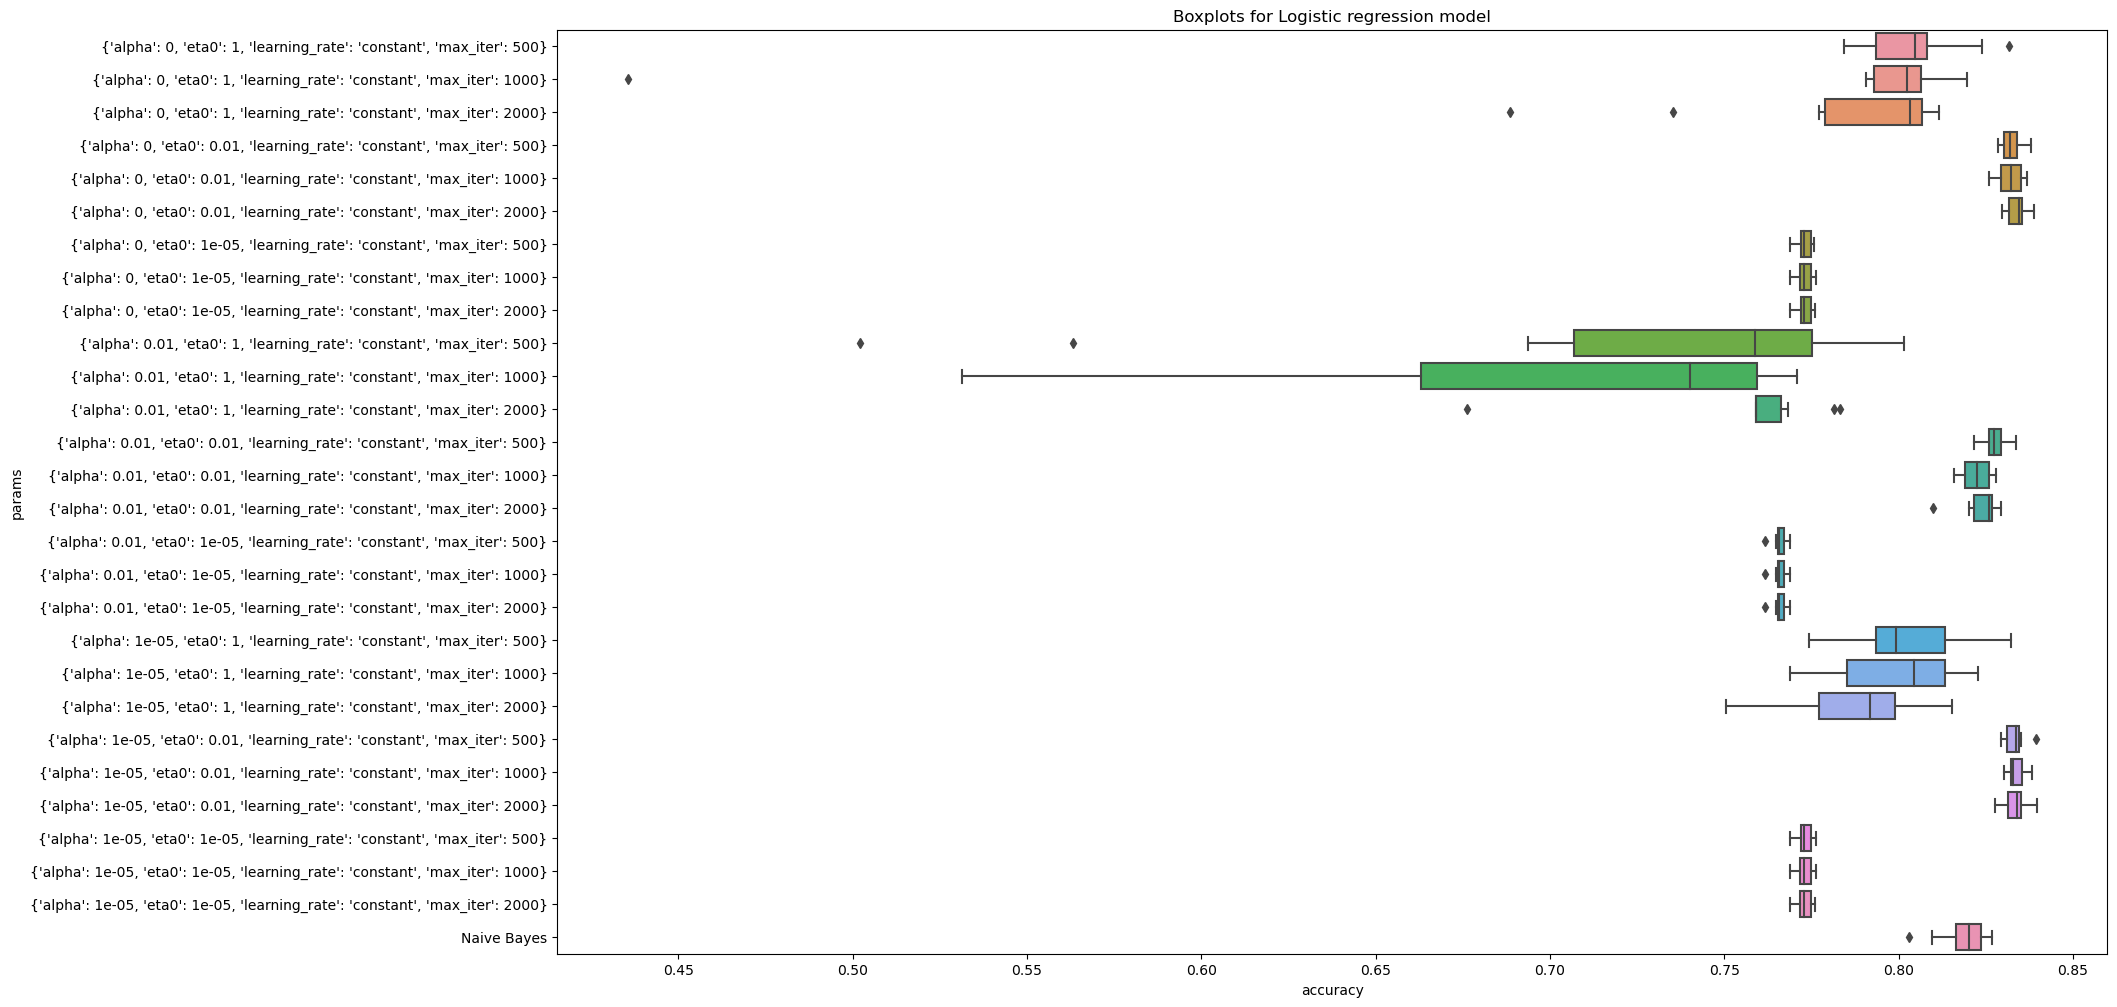

In [114]:
#boxplots

plt.figure(figsize=(20, 12))
sns.boxplot(data=df_res, orient='h')
plt.xlabel('accuracy')
plt.title('Boxplots for Logistic regression model')
plt.show()

In [115]:
# Naive Bayes prediction on test set 
y_pred_nb_encoded=nb_clf.predict(X_test_transformed_df)
y_pred_nb_encoded

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [116]:
# Convert binary labels to strings
y_pred_nb = [' <=50K' if label == 0 else ' >50K' for label in y_pred_nb_encoded]
y_pred_nb

[' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',

In [117]:
#saving predictions in a csv file
output_file_path = 'C:\\Users\\LEGION\\data_projects\\prediction_b.csv'

df_y__test_pred_nb=pd.DataFrame({'labels': y_pred_nb})
df_y__test_pred_nb.to_csv(output_file_path, index=False)